In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import math
import random

### Let's work through some basic plotting

67859 1130 3392


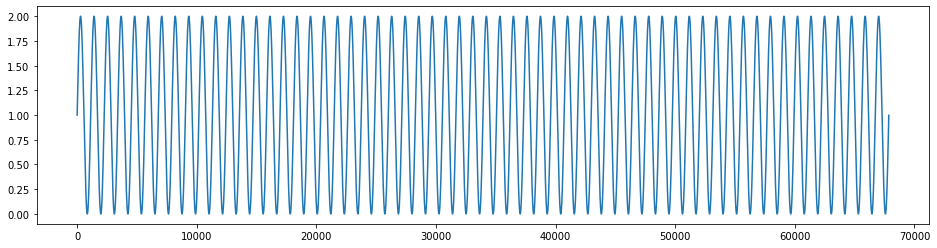

In [329]:
RAD = np.pi * 2
PERIODS = 3
INTERVALS = 20 # we can think of interval as seconds
TOTAL_PERIODS = PERIODS * INTERVALS
RESOLUTION = 3 # can be used to get additional steps in the graph / higher resolution
STEP_SIZE = 1 / (TOTAL_PERIODS * RESOLUTION)

rad_increments = np.arange(0, RAD * TOTAL_PERIODS, STEP_SIZE)

# make increments length rounded to nearest 100
#cut_off = rad_increments.shape[0] % 100
#rad_increments = rad_increments[:-cut_off]
TOTAL_RAD_INCREMENTS = rad_increments.shape[0]
RAD_INCREMENTS_PER_PERIOD = TOTAL_RAD_INCREMENTS // TOTAL_PERIODS
RAD_INCREMENTS_PER_INTERVAL = TOTAL_RAD_INCREMENTS // INTERVALS
print(TOTAL_RAD_INCREMENTS, RAD_INCREMENTS_PER_PERIOD, RAD_INCREMENTS_PER_INTERVAL)

signal = np.sin(rad_increments) + 1

# plot over time
plt.figure(figsize=(16,4))
plt.plot(signal);

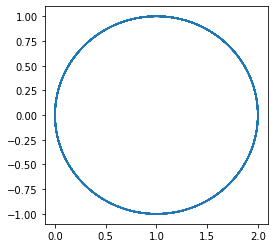

In [197]:
# plot signal as a circle
xs = signal
ys = np.cos(rad_increments)

plt.figure(figsize=(4,4))
plt.plot(xs, ys);

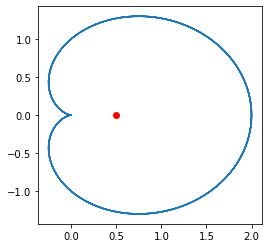

In [330]:
INTERVALS_PER_SAMPLE = 1

sample_size = RAD_INCREMENTS_PER_INTERVAL * INTERVALS_PER_SAMPLE

p_xs = np.sin(rad_increments[:sample_size]) * signal[:sample_size]
p_ys = np.cos(rad_increments[:sample_size]) * signal[:sample_size]
com_x, com_y = (p_xs.mean(), p_ys.mean())

plt.figure(figsize=(4,4))
plt.plot(p_xs, p_ys)
plt.plot(com_x, com_y, 'ro')


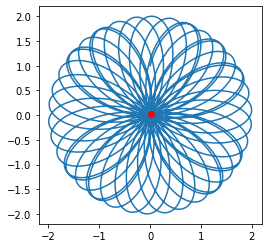

In [354]:
SAMPLE_PERIODS_PER_CYCLE = 11.34

def build_cycle_sample(periods_per_cycle:float):
    sample_size = periods_per_cycle * INTERVALS * RESOLUTION
    sample_step_size = 1 / sample_size
    sample_rad_increments = np.arange(0, RAD * periods_per_cycle, sample_step_size)
    clip_size = sample_rad_increments.shape[0]

    q_xs = np.sin(sample_rad_increments) * signal[:clip_size]
    q_ys = np.cos(sample_rad_increments) * signal[:clip_size]
    q_com_x, q_com_y = (q_xs.mean(), q_ys.mean())
    
    return q_xs, q_ys, q_com_x, q_com_y

q_xs, q_ys, q_com_x, q_com_y = build_cycle_sample(SAMPLE_PERIODS_PER_CYCLE)

plt.figure(figsize=(4,4))
plt.plot(q_xs, q_ys)
plt.plot(q_com_x, q_com_y, 'ro')


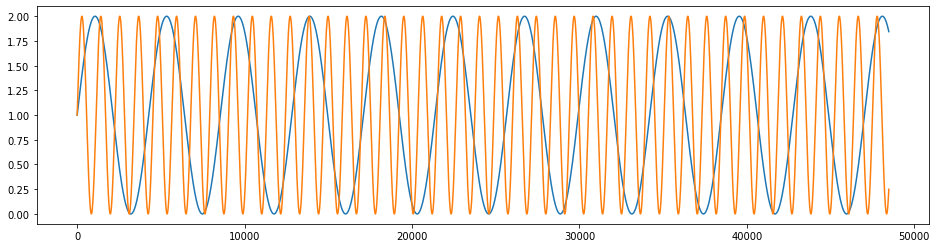

In [355]:
plt.figure(figsize=(16,4))
plt.plot(np.sin(sample_rad_increments) + 1);
plt.plot(signal[:clip_size]);

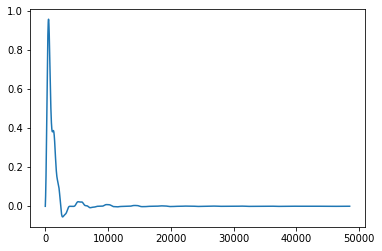

In [359]:
def rolling_average(x):
    result = []
    for i in range(1, x.shape[0]):
        result.append(x[:i].mean())
    return np.array(result)

plt.plot(rolling_average(q_xs) * rolling_average(q_ys))

ValueError: The number of FixedLocator locations (24), usually from a call to set_ticks, does not match the number of ticklabels (48).

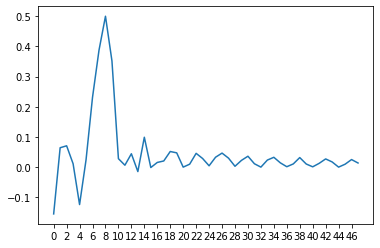

In [386]:
coms = []
l = np.arange(1, 13, 0.25)
for x in l:
    _, _, com_x, comy = build_cycle_sample(x)
    coms.append(com_x)
    
plt.plot(coms)
plt.xticks(range(0, len(l), 2), [f'{xx:.1f}' for xx in l], rotation=45);